In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
img = cv2.imread('Klumba.jpg')

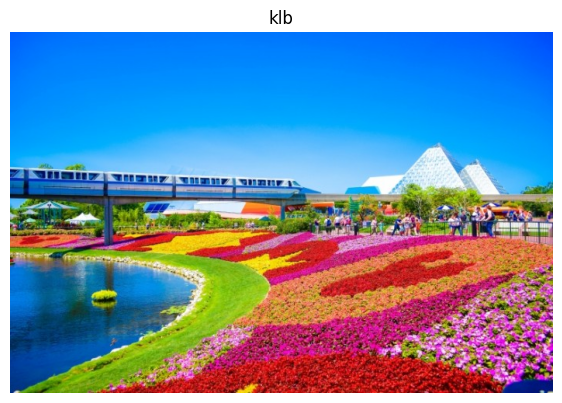

In [7]:
draw_picture(img, 'klb',bgr=False)

In [8]:
algorithms = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=5),
    KMeans(n_clusters=10),
    KMeans(n_clusters=20),    
    DBSCAN(),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=5),
    AgglomerativeClustering(n_clusters=10),
    AgglomerativeClustering(n_clusters=20)    
]

In [9]:
X = img.reshape(-1, 2)

In [10]:
X

array([[255,  92],
       [  0, 255],
       [ 92,   0],
       ...,
       [175, 213],
       [201, 171],
       [210, 195]], dtype=uint8)

In [11]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [12]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [ ]:
for alg in algorithms:
    cluster = alg.fit(X)
    y_pred = cluster.predict(X)
    print(silhouette_score(X,y_pred))